In [1]:
#importando dependências necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from astroquery.vizier import Vizier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

<Table length=6000>
 name   dtype  unit  format                     description                     n_bad
------ ------- ---- ------- --------------------------------------------------- -----
   J-H float32  mag {:5.2f}         [-0.3/4.7]? J-H color from 2MASS photometry     4
  Gmag float32  mag {:5.2f}                  [7.4/17] Gaia DR2 G-band magnitude     0
   G-J float32  mag {:5.2f} [-5/4.42]? G-J color from Gaia and 2MASS photometry     4
  H-Ks float32  mag {:5.2f}        [-0.4/1.2]? H-Ks color from 2MASS photometry     4
cLabel   str17                                                 Coarse Label (3)     0


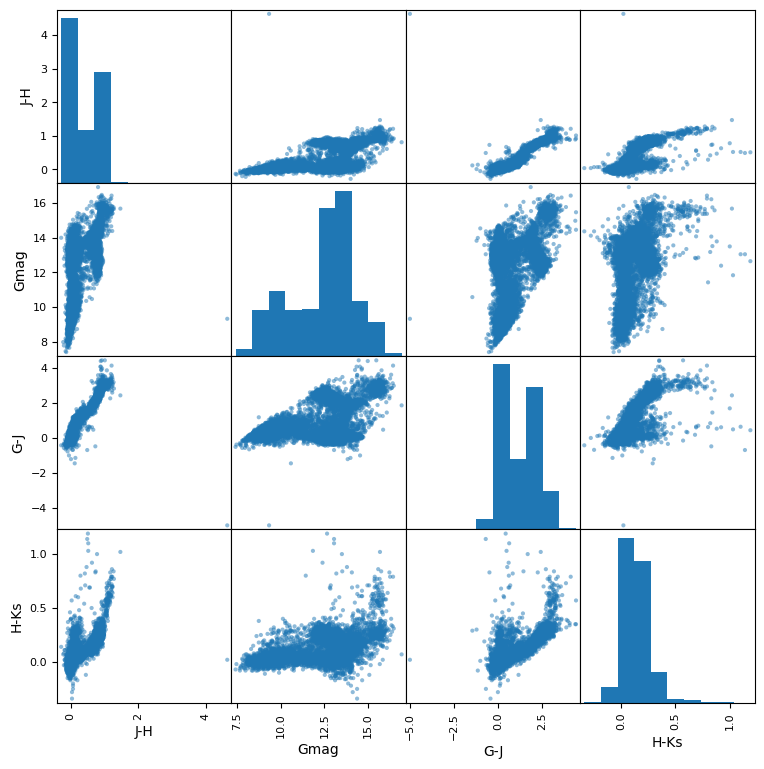

In [2]:
#Pegando colunas específicas do catálogo
catalog = Vizier(catalog="J/ApJ/913/32/sample", columns=['J-H','Gmag','G-J','H-Ks','cLabel'])

#Definindo um limite de linhas
catalog.ROW_LIMIT = 6000

#definindo os constraints do catálogo, para poder importá-lo
result = catalog.query_constraints()
result[0].info()
result[0]

#Pegando a primeira tabela do catálogo e checando se há realmente linhas.
if result:
    table = result[0]
    if len(table) > 0:
        df = table.to_pandas()  #conversão de astropy para um dataframe do pandas
        scatter_matrix(df, diagonal='hist', figsize=(9, 9))  # Criando um scatter plot matrix
        plt.show()
    else:
        print("Tabela vazia")
else:
    print("Sem resultados")

In [3]:
df.head()

,J-H,Gmag,G-J,H-Ks,cLabel
0,0.06,9.07,0.35,0.03,Cool
1,0.18,11.55,0.72,0.01,Hot
2,0.16,11.85,0.88,0.06,EM
3,0.01,9.81,0.47,0.00,Hot
4,-0.15,8.19,-0.66,-0.03,Hot


In [4]:
df.describe()

,J-H,Gmag,G-J,H-Ks
count,5996.000000,6000.000000,5996.000000,5996.00000
mean,0.380776,12.384451,1.210033,0.13200
std,0.371250,1.870862,1.030788,0.13219
min,-0.280000,7.410000,-5.000000,-0.34000
25%,0.040000,10.950000,0.260000,0.03000
50%,0.220000,12.840000,0.950000,0.11000
75%,0.760000,13.670000,2.160000,0.22000
max,4.630000,16.920000,4.420000,1.19000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   J-H     5996 non-null   float32
 1   Gmag    6000 non-null   float32
 2   G-J     5996 non-null   float32
 3   H-Ks    5996 non-null   float32
 4   cLabel  6000 non-null   object 
dtypes: float32(4), object(1)
memory usage: 140.8+ KB


In [6]:
#Definindo alguns dataframes. O primeiro conterá todas as linhas, e os demais serão filtrados pelo tipo do objeto
df2 = df
df_hot = df[df['cLabel'] == 'Hot']
df_cool = df[df['cLabel'] == 'Cool']
df_em = df[df['cLabel'] == 'EM']
df_un = df[df['cLabel'] == 'Unknown/Candidate']

In [7]:
#Checando se irei pegar as colunas Gmag e G-J corretamente
df.iloc[:, 1]

0        9.07
1       11.55
2       11.85
3        9.81
4        8.19
        ...  
5995    10.16
5996     9.22
5997    10.19
5998     8.10
5999     9.36
Name: Gmag, Length: 6000, dtype: float32

In [8]:
df.iloc[:, 2]

0       0.35
1       0.72
2       0.88
3       0.47
4      -0.66
        ... 
5995    0.94
5996    0.84
5997    0.35
5998    0.01
5999    0.02
Name: G-J, Length: 6000, dtype: float32

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


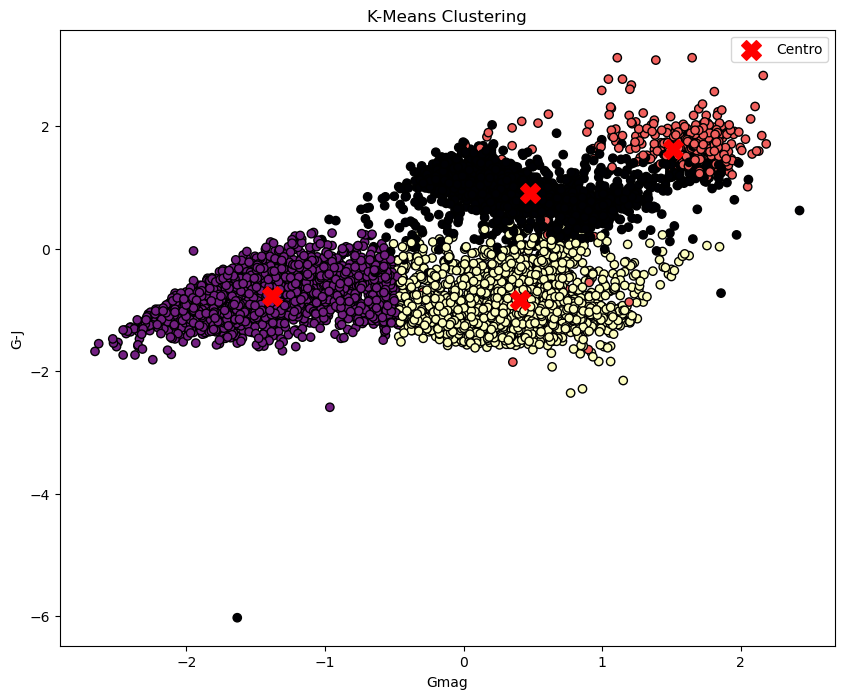

In [9]:
#Ajuste de normalização com todos os objetos
scaler = StandardScaler()
scaler.fit(df2.drop("cLabel", axis = 1)) 

data_normalized = scaler.transform(df2.drop('cLabel', axis=1))

data_param = pd.DataFrame(data_normalized, columns = df2.columns[1:])

X = data_param 
X = X.dropna()

#Números de aglomerados a se gerar. Escolhi 4.
n_clusters = 4

#Definindo o KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Realizando o ajuste
kmeans.fit(X)

#Predição dos centros e aglomerados
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

#Plot
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='magma', edgecolor='k')
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centro')
plt.title('K-Means Clustering')
plt.xlabel('Gmag')
plt.ylabel('G-J')
plt.legend()
plt.show()

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


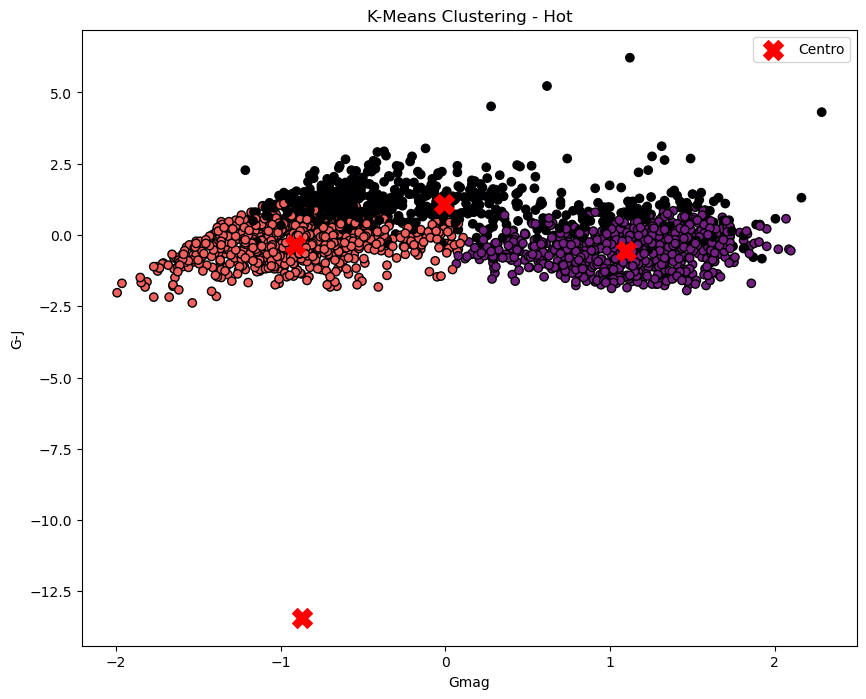

In [10]:
#Mesmos passos anteriores, mas com o dataframe de objetos hot
scaler = StandardScaler()
scaler.fit(df_hot.drop("cLabel", axis = 1)) 

data_normalized = scaler.transform(df_hot.drop('cLabel', axis=1))

data_param = pd.DataFrame(data_normalized, columns = df_hot.columns[1:])

X = data_param 
X = X.dropna()


n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='magma', edgecolor='k')
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centro')
plt.title('K-Means Clustering - Hot')
plt.xlabel('Gmag')
plt.ylabel('G-J')
plt.legend()
plt.show()

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


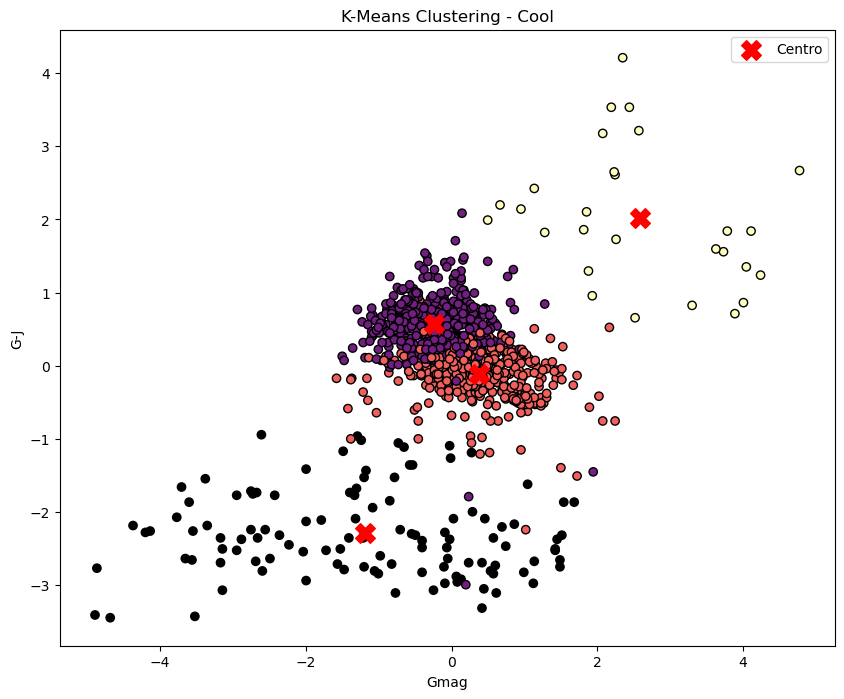

In [11]:
#Mesmos passos anteriores, mas com o dataframe de objetos cool
scaler = StandardScaler()
scaler.fit(df_cool.drop("cLabel", axis = 1)) 

data_normalized = scaler.transform(df_cool.drop('cLabel', axis=1))

data_param = pd.DataFrame(data_normalized, columns = df_cool.columns[1:])

X = data_param 
X = X.dropna()

n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)


labels = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='magma', edgecolor='k')
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centro')
plt.title('K-Means Clustering - Cool')
plt.xlabel('Gmag')
plt.ylabel('G-J')
plt.legend()
plt.show()

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


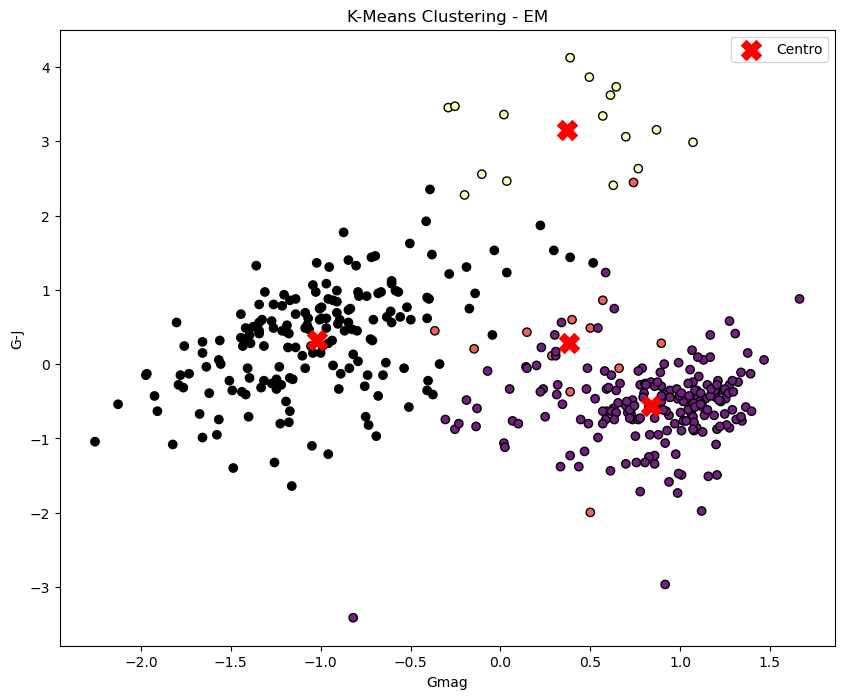

In [12]:
#Mesmos passos anteriores, mas com o dataframe de objetos EM
scaler = StandardScaler()
scaler.fit(df_em.drop("cLabel", axis = 1)) 

data_normalized = scaler.transform(df_em.drop('cLabel', axis=1))

data_param = pd.DataFrame(data_normalized, columns = df_em.columns[1:])

X = data_param 
X = X.dropna()


n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)


labels = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='magma', edgecolor='k')
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centro')
plt.title('K-Means Clustering - EM')
plt.xlabel('Gmag')
plt.ylabel('G-J')
plt.legend()
plt.show()

C:\Users\natasha.fonseca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


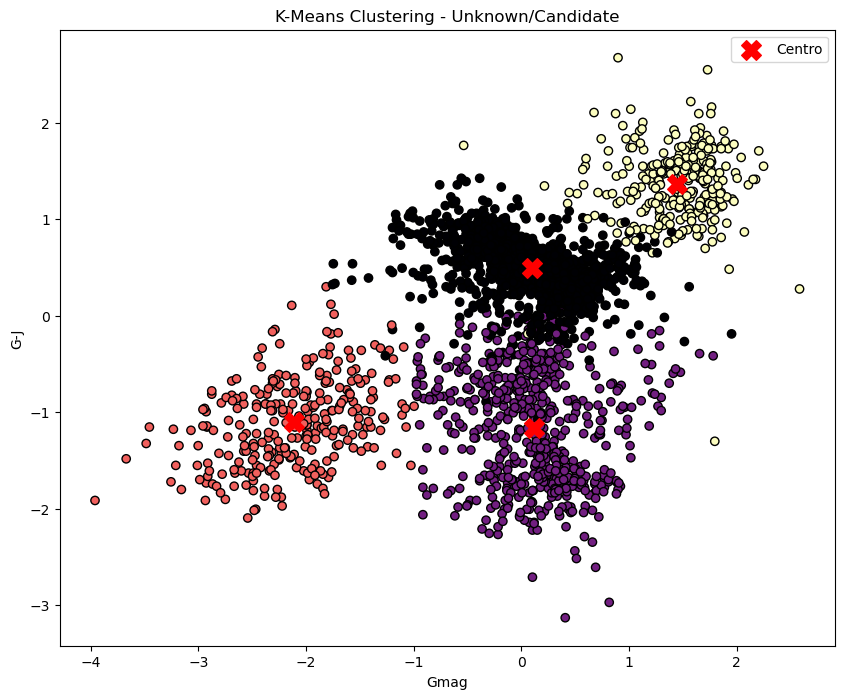

In [13]:
#Mesmos passos anteriores, mas com o dataframe de objetos desconhecidos/candidatos
scaler = StandardScaler()
scaler.fit(df_un.drop("cLabel", axis = 1)) 

data_normalized = scaler.transform(df_un.drop('cLabel', axis=1))

data_param = pd.DataFrame(data_normalized, columns = df_un.columns[1:])

X = data_param 
X = X.dropna()


n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)


labels = kmeans.predict(X)
centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='magma', edgecolor='k')
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centro')
plt.title('K-Means Clustering - Unknown/Candidate')
plt.xlabel('Gmag')
plt.ylabel('G-J')
plt.legend()
plt.show()

---------

In [14]:
#Definindo nosso novo dataframe
df3 = df[['Gmag','G-J','J-H','H-Ks','cLabel']]
df3.info()
X = df2.drop('cLabel', axis=1) #excluindo a coluna cLabel para uma classificação apenas baseada nos parâmetros

lab_enc = preprocessing.LabelEncoder() #transformando classes em números
y_encoded = lab_enc.fit_transform(df2['cLabel'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gmag    6000 non-null   float32
 1   G-J     5996 non-null   float32
 2   J-H     5996 non-null   float32
 3   H-Ks    5996 non-null   float32
 4   cLabel  6000 non-null   object 
dtypes: float32(4), object(1)
memory usage: 140.8+ KB


                   precision    recall  f1-score   support

             Cool       0.54      0.86      0.67        36
              Hot       0.69      0.76      0.73       336
Unknown/Candidate       0.61      0.49      0.54       113
               EM       0.75      0.85      0.79       566

        micro avg       0.71      0.78      0.74      1051
        macro avg       0.65      0.74      0.68      1051
     weighted avg       0.71      0.78      0.74      1051



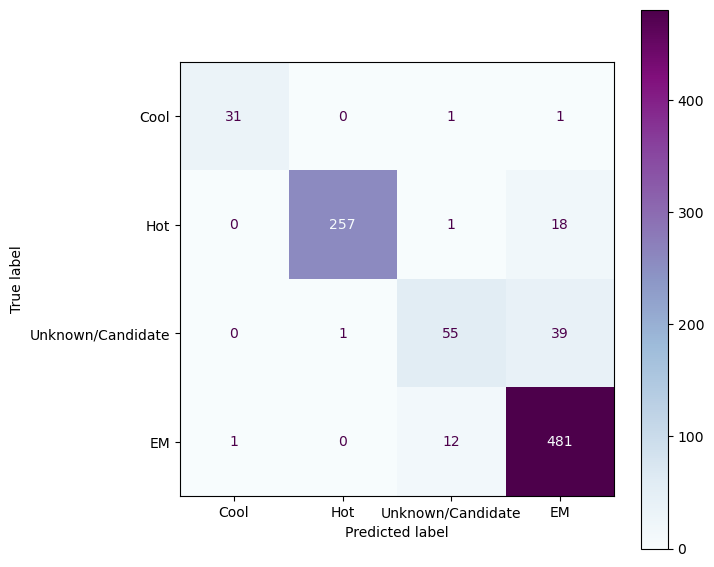

In [15]:
#Separando os dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 3) #max_depth = 3 para evitar overfitting, problema clássico em árvores de decisão

#Lembrando que, como vimos em aula:
#splitter = "best" indica melhor separação possível para os dados
#criterion = "entropy" indica que a árvore buscará ter sempre apenas uma classe dentro de cada separação, logo, entropia = 0

#Iniciando o trinamento e realizando as predições
dtc = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)


#Código do Classification Report, para vermos os resultados de capacidade de predição de cada modelo
print(classification_report(y_test, pred, labels=[0,1,2,3], target_names=['Cool','Hot','Unknown/Candidate','EM']))

#Criando e plotando a matriz de confusão!
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, pred, labels = [0,1,2,3], display_labels = ['Cool','Hot','Unknown/Candidate','EM'], cmap='BuPu', ax=ax)
ax.tick_params(axis='both', which='major')